REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### Problem 22.1

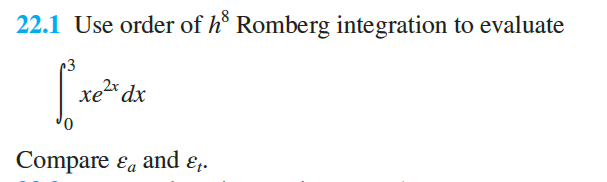

### Answer

1. Define Functions

In [2]:
# reference: these functions are from my submitted assignment of last semester
def true_percent_relative_error(true, approx):
    """
    Computes the true percent relative error (in percent)
    """
    if true == 0:
        return None
    epsilon_t = (true - approx) / true * 100 
    return epsilon_t

In [3]:
def trap_eq(f, a, b, n):
    """
    Reference: implements the algorithm in the figure 22.1 in the textbook
    trapezoidal multiple applcations
    """
    
    width = (b - a) / n
    x = a
    _sum = f(x)
    for i in range(1, n):
        x += width
        _sum += 2 * f(x)
    
    _sum += f(b)
    trap_eq = width * _sum / 2

    return trap_eq

In [4]:
def romberg(f, a, b, max_it, es):
    """
    Reference: implements the code in figure 22.4 in the textbook
    Romberg integration (trapezoidal rule, segment of equal size)  
    """
    
    result = [([0] * 11) for i in range(11)]
    n = 1
    result[1][1] = trap_eq(f, a, b, n)
    
    _iter = 0
    while True:
        _iter += 1
        n = 2 ** _iter
        result[_iter + 1][1] = trap_eq(f, a, b, n)
        for k in range(2, _iter + 2):
            j = 2 + _iter - k
            result[j][k] = (4 ** (k - 1) * result[j+1][k-1] - result[j][k-1]) / (4 ** (k - 1) - 1)
            
        ea = abs((result[1][_iter+1] - result[2][_iter]) / result[1][_iter+1]) * 100
        if _iter > max_it or ea <= es:
            break
    
    print('Final approximation: {:.6f}'.format(result[1][_iter+1]))
    print('Approximate percent relative error is {:.4f}%'.format(ea))
    df = pd.DataFrame(result)
    df.columns = ['None', 'h2', 'h4', 'h6', 'h8', 'h10'
                         , 'h12', 'h14', 'h16', 'h18', 'h20']
    return df

2. Problem Solving

In [5]:
# define function
def f_1(x):
    return x * np.exp(2*x)

In [6]:
romberg(f_1, 0, 3, 100, 0.5)

Final approximation: 504.693241
Approximate percent relative error is 0.0291%


,None,h2,h4,h6,h8,h10,h12,h14,h16,h18,h20
0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
1,0,1815.429571,665.399801,514.077944,504.693241,0,0,0,0,0,0
2,0,952.907243,523.535560,504.839877,0.000000,0,0,0,0,0,0
3,0,630.878481,506.008358,0.000000,0.000000,0,0,0,0,0,0
4,0,537.225888,0.000000,0.000000,0.000000,0,0,0,0,0,0
5,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
6,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
7,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
8,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
9,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0


In [7]:
true_error = true_percent_relative_error(504.53599186591896, 504.693241)
print('True percent relative error is {:.4f}%'.format(true_error))

True percent relative error is -0.0312%


The approximate and true relative error are similar, both are very low, with the absolute value of the true percent relative error slightly higher.  But either of them illustrates that this is a very accurate approximation.

3. Testing

In [8]:
import scipy.integrate as integrate
integrate.quad(lambda x: f_1(x), 0, 3)

(504.53599186591896, 5.6014747492163395e-12)

### Problem 22.3

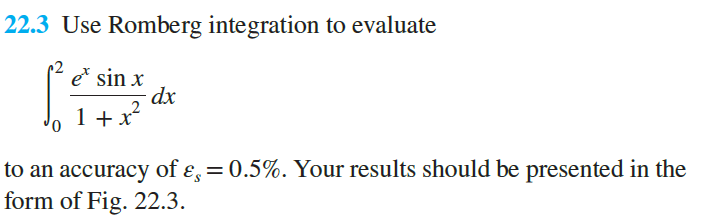

### Answer

1. Define Functions

2. Problem Solving

In [9]:
# define function
def f_2(x):
    return (np.exp(x) * np.sin(x)) / (1 + x ** 2)

In [10]:
romberg(f_2, 0, 2, 100, 0.5)

Final approximation: 1.941836
Approximate percent relative error is 0.0997%


,None,h2,h4,h6,h8,h10,h12,h14,h16,h18,h20
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
1,0,1.343770,1.972827,1.941836,0,0,0,0,0,0,0
2,0,1.815563,1.943773,0.000000,0,0,0,0,0,0,0
3,0,1.911720,0.000000,0.000000,0,0,0,0,0,0,0
4,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
5,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
6,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
7,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
8,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
9,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0


3. Testing

In [11]:
import scipy.integrate as integrate
integrate.quad(lambda x: f_2(x), 0, 2)

(1.9401300220307203, 5.1277681906152846e-11)